# Topology: network properties

Import modules:

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

When studying the topology of a network, we refer to the characteristics of the network structure.

There are many metrics that allow us to characterize and compare network topologies.

Example of these features/metrics are:
+ Network Size ($N_i$)
+ Number of links ($E_i$)
+ Node degree ($K_{i,u}$)
+ Density ($d_i$)
+ Accumulated degree ($K_i$)
+ Weighted link of attribute ($W_i$)
+ Number of components ($c_i$)
+ Nodes of the largest connected component ($S_i$)
+ Mean clustering coefficient ($\langle C_i \rangle$)
+ Number of triangles ($\# \Delta$)
+ Average path length ($\langle l \rangle$)


**Example:** Florenntine families Graph

Text(0.5, 1.0, '$Florentine\\ families\\ graph$')

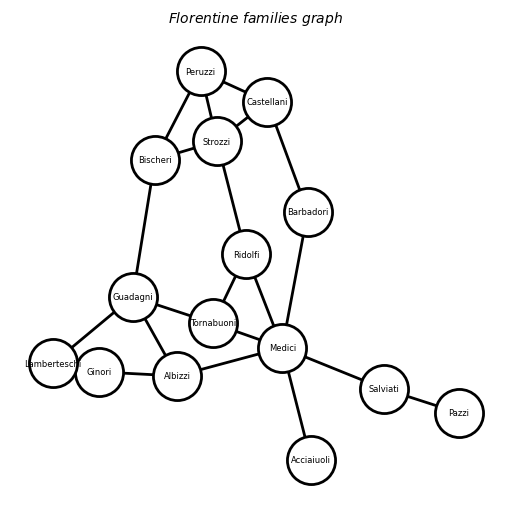

In [30]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.florentine_families_graph()
pos = nx.spring_layout(G, iterations=50, seed=0)

fig, axs = plt.subplots(figsize=(5, 5), facecolor='w', constrained_layout=True)

nx.draw_networkx_nodes(G, pos, node_color='white', linewidths=2, edgecolors='k', ax=axs, node_size=1200)
nx.draw_networkx_edges(G, pos, width=2, ax=axs)
nx.draw_networkx_labels(G, pos, font_size=6, ax=axs)

axs.axis('off')
axs.set_title("$Florentine\ families\ graph$", fontsize=10)


## Topology measures

####  Network size ($N_i$)

Number of nodes.

In [6]:
network_size = G.number_of_nodes() 
network_size

15

#### Number of links ($E_i$)

Number of edges or connections.

In [7]:
number_of_links = G.number_of_edges() 
number_of_links

20

#### Node degree ($K_{i,u}$)

In [8]:
G.degree()

DegreeView({'Acciaiuoli': 1, 'Medici': 6, 'Castellani': 3, 'Peruzzi': 3, 'Strozzi': 4, 'Barbadori': 2, 'Ridolfi': 3, 'Tornabuoni': 3, 'Albizzi': 3, 'Salviati': 2, 'Pazzi': 1, 'Bischeri': 3, 'Guadagni': 4, 'Ginori': 1, 'Lamberteschi': 1})

In [9]:
G.degree()

DegreeView({'Acciaiuoli': 1, 'Medici': 6, 'Castellani': 3, 'Peruzzi': 3, 'Strozzi': 4, 'Barbadori': 2, 'Ridolfi': 3, 'Tornabuoni': 3, 'Albizzi': 3, 'Salviati': 2, 'Pazzi': 1, 'Bischeri': 3, 'Guadagni': 4, 'Ginori': 1, 'Lamberteschi': 1})

In [10]:
dict(G.degree()).values()

dict_values([1, 6, 3, 3, 4, 2, 3, 3, 3, 2, 1, 3, 4, 1, 1])

In [11]:
G_degrees = np.array(list(dict(G.degree()).values()))
G_degrees

array([1, 6, 3, 3, 4, 2, 3, 3, 3, 2, 1, 3, 4, 1, 1])

#### Density ($d_i$)

 Ratio of actual connections $d_i = \frac{2 E_i}{N_i (N_i - 1)}$ for undirected graphs and $d_i = \frac{E_i}{N_i (N_i - 1)}$ for directed ones.

In [12]:
density = nx.density(G) 
density, 2*(number_of_links/(network_size*(network_size-1)))

(0.19047619047619047, 0.19047619047619047)

#### Accumulated degree ($K_i$)

 Total contacts in Graph $i$.
 
 $K_i = \sum_n k_n$

In [13]:
accumulated_degree = np.sum(G_degrees)
accumulated_degree

40

#### Number of components ($c_i$)

In [14]:
number_connected_components = nx.number_connected_components(G)
number_connected_components

1

Network structure/fragmentation.

#### Mean clustering coefficient $\langle C_i \rangle$

Probabbility of common neighbours.

$\langle C_i \rangle = \frac{1}{N_i} \sum_n C^\prime_{n,i}$, where $C^\prime_{n,i} = \frac{E^{(n)}}{k_n(k_n-1)}$

In [15]:
mean_clustering_coef = nx.average_clustering(G)
mean_clustering_coef

0.16

#### Number of triangles ($\#\Delta$)

Number of triangles that includes a given node as one of its vertex.

In [16]:
nx.triangles(G)

{'Acciaiuoli': 0,
 'Medici': 1,
 'Castellani': 1,
 'Peruzzi': 2,
 'Strozzi': 2,
 'Barbadori': 0,
 'Ridolfi': 1,
 'Tornabuoni': 1,
 'Albizzi': 0,
 'Salviati': 0,
 'Pazzi': 0,
 'Bischeri': 1,
 'Guadagni': 0,
 'Ginori': 0,
 'Lamberteschi': 0}

In [17]:
G_tri = np.array(list(dict(nx.triangles(G)).values()))

In [18]:
G_tri

array([0, 1, 1, 2, 2, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [19]:
average_triangles = np.mean(G_tri)
average_triangles

0.6

#### Average path length $\langle l \rangle$

Social accessibility between non-interactings.

$\langle l \rangle = \sum \sum l_{i,j}$

In [20]:
average_shortest_path_length = nx.average_shortest_path_length(G)
average_shortest_path_length

2.4857142857142858

## Example: Comparison of topology metric between two networks

In this section, we will compare the topology of two networks based on some of previous measures.

In [21]:
G1 = nx.florentine_families_graph()
G2 = nx.karate_club_graph()

Text(0.5, 1.0, '"Karate club"')

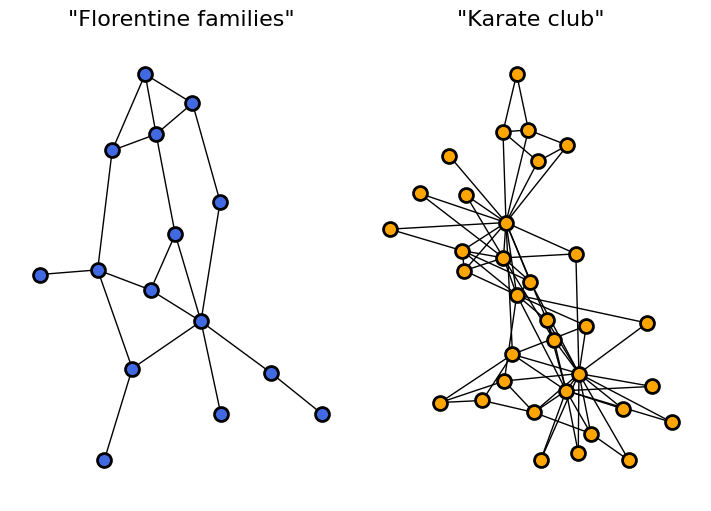

In [22]:
fig, axs = plt.subplots(figsize=(7,5), facecolor='w', nrows=1, ncols=2, constrained_layout=True) #, gridspec_kw={'width_ratios': [1.5, 1]})

pos = nx.spring_layout(G1, iterations=100, seed=0)
sc = nx.draw_networkx_nodes(G1, pos, node_color='royalblue', linewidths=2, edgecolors='k', ax=axs[0], node_size=100)
nx.draw_networkx_edges(G1, pos, width=1, ax=axs[0])

pos = nx.spring_layout(G2, iterations=100, seed=0)
sc = nx.draw_networkx_nodes(G2, pos, node_color='orange', linewidths=2, edgecolors='k', ax=axs[1], node_size=100)
nx.draw_networkx_edges(G2, pos, width=1, ax=axs[1])
axs[0].axis('off'); axs[1].axis('off');
axs[0].set_title('"Florentine families"', fontsize=16)
axs[1].set_title('"Karate club"', fontsize=16)

Thus, for both graphs, we will compute the next metrics:
+ Network size ($N_i$)
+ Number of links ($E_i$)
+ Average node degree ($\langle K_{i} \rangle$)
+ Density ($d_i$)
+ Accumulated degree ($K_i$)
+ Mean clustering coefficient ($\langle C_i \rangle$)
+ Average number of triangles ($\langle \# \Delta \rangle$)
+ Average path length ($\langle l \rangle$)



In [23]:
def get_topology_values(G):
  # input:
  # G: Networkx Graph
  # out:
  # dict (key: metric name, value: metric value)

  d_topology_vals = {
      "network_size" : G.number_of_nodes(),
      "number_of_links" : G.number_of_edges(),
      "avg_degree" : np.mean(list(dict(G.degree()).values())),
      "density" : nx.density(G),
      "accumulated_degeree" : np.sum(list(dict(G.degree()).values())),
      "avg_clustering_coef" : nx.average_clustering(G),
      "avg_triangles" : np.mean(list(nx.triangles(G).values())),
      "avg_path_length" : nx.average_shortest_path_length(G),
  }

  return d_topology_vals

In [24]:
topology_G1 = get_topology_values(G1)
topology_G2 = get_topology_values(G2)

In [25]:
df = pd.DataFrame([topology_G1, topology_G2], index=["G_1", "G_2"])

In [26]:
df.T

,G_1,G_2
network_size,15.000000,34.000000
number_of_links,20.000000,78.000000
avg_degree,2.666667,4.588235
density,0.190476,0.139037
accumulated_degeree,40.000000,156.000000
avg_clustering_coef,0.160000,0.570638
avg_triangles,0.600000,3.970588
avg_path_length,2.485714,2.408200


## References 


1. Maarten van Steen (2010). Graph Theory and Complex Networks. An Introduction (Book).
1. Newman, M. (2010). Networks: An Introduction (Book).
Robin J. Wilson (1996). Introduction to Graph Theory (eBook: https://www.maths.ed.ac.uk/~v1ranick/papers/wilsongraph.pdf).
1. Samaniego, H., Franco-Cisterna, M., & Sotomayor-Gómez, B. (2020). The topology of communicating across cities of increasing sizes, or the complex task of “reaching out” in larger cities. Theories and Models of Urbanization: Geography, Economics and Computing Sciences, 97-118. (Article, https://link.springer.com/chapter/10.1007/978-3-030-36656-8_6)

---